#### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn import metrics                           
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

**Import "Refined_csv"**

In [2]:
df_clean = pd.read_csv("Refined_data.csv")
df_clean.head()

/home/deepfintech/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,index,amount_tsh,gps_height,longitude,latitude,wpt_name,basin,subvillage,region,...,management_group,payment,water_quality,quantity,source,source_class,waterpoint_type,status_group,installer_category,funder_categories
0,0,0,6000.0,1390,34.938093,-9.856322,45683,1,13116,3,...,4,2,6,1,8,0,1,functional,15,11
1,1,1,0.0,1399,34.698766,-2.147466,45426,4,17596,9,...,4,0,6,2,5,1,1,functional,15,11
2,2,2,25.0,686,37.460664,-3.821329,17767,5,10096,8,...,4,4,6,1,0,1,2,functional,26,11
3,3,3,0.0,263,38.486161,-11.155298,45537,7,9998,12,...,4,0,6,0,3,0,2,non functional,21,16
4,4,4,0.0,0,31.130847,-1.825359,43411,4,8583,4,...,1,0,6,3,5,1,1,functional,15,11


### **Feature Importance**

In [5]:
X_train, X_test = train_test_split(df_clean[:59400], test_size = 0.2, random_state = 4)

print (X_train.shape)
print (X_test.shape)

(47520, 32)
(11880, 32)


In [6]:
y_train = X_train.pop('status_group')
y_test = X_test.pop('status_group')

print (y_train.shape)
print (y_test.shape)

(47520,)
(11880,)


In [7]:
clf=RandomForestClassifier(criterion='gini',   #entropy
                          min_samples_split=2,
                          min_samples_leaf=1,
                          max_features='auto',
                          oob_score=False,
                          random_state=1,
                           n_jobs=-1
                          ) 
clf.fit(X_train,y_train)
prediction=clf.predict(X_test)
print("The accuracy of the Decision Tree is",format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.8065656565656566


In [21]:
importance=clf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.04952
Feature: 1, Score: 0.04935
Feature: 2, Score: 0.02703
Feature: 3, Score: 0.04238
Feature: 4, Score: 0.07832
Feature: 5, Score: 0.07417
Feature: 6, Score: 0.05210
Feature: 7, Score: 0.01193
Feature: 8, Score: 0.05125
Feature: 9, Score: 0.01539
Feature: 10, Score: 0.01549
Feature: 11, Score: 0.01636
Feature: 12, Score: 0.02468
Feature: 13, Score: 0.04002
Feature: 14, Score: 0.03108
Feature: 15, Score: 0.00508
Feature: 16, Score: 0.02530
Feature: 17, Score: 0.00598
Feature: 18, Score: 0.03950
Feature: 19, Score: 0.02414
Feature: 20, Score: 0.03083
Feature: 21, Score: 0.01527
Feature: 22, Score: 0.00676
Feature: 23, Score: 0.02195
Feature: 24, Score: 0.01288
Feature: 25, Score: 0.11379
Feature: 26, Score: 0.01834
Feature: 27, Score: 0.00571
Feature: 28, Score: 0.05319
Feature: 29, Score: 0.01854
Feature: 30, Score: 0.02368


**Plotting feature importnance**

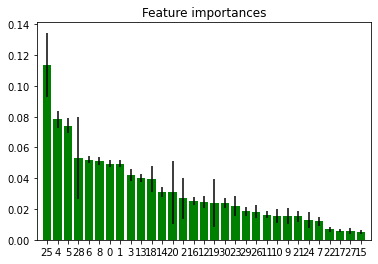

In [22]:
importance=clf.feature_importances_
indices = np.argsort(importance)[::-1]
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importance[indices], color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

****

In [38]:
trainX = df_clean[:59400].copy()
trainY= trainX.pop('status_group')

print ("trainX shape : ", trainX.shape)
print ("trainY shape : ", trainY.shape)

trainX shape :  (59400, 32)
trainY shape :  (59400,)


/home/deepfintech/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### **Sequential Feature Selection**

In [39]:
# Random forest classifier
sfs = SFS(RandomForestClassifier(criterion='gini',   #with sqrrfs 0.6948, with out sqrrfs 68.88
                          min_samples_split=5,
                          min_samples_leaf=1,
                          max_features='auto',
                          oob_score=False,
                          random_state=1,
                           n_jobs=-1
                        
                          ) , 
           k_features=trainX.shape[1], 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5)
sfs = sfs.fit(trainX, trainY)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:  2.8min finished

[2021-09-17 06:23:01] Features: 1/32 -- score: 0.6521380471380471[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:  3.0min finished

[2021-09-17 06:26:04] Features: 2/32 -- score: 0.7217003367003366[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.8min finished

[2021-09-17 06:28:51] Features: 3/32 -- score: 0.7577441077441078[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [40]:
sfdf = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfdf

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(13,)","[0.6468013468013468, 0.6525252525252525, 0.658...",0.652138,"(ward,)",0.004813,0.003745,0.001873
2,"(13, 25)","[0.7208754208754209, 0.7204545454545455, 0.726...",0.7217,"(ward, quantity)",0.003336,0.002596,0.001298
3,"(13, 25, 28)","[0.7626262626262627, 0.7563131313131313, 0.758...",0.757744,"(ward, quantity, waterpoint_type)",0.003844,0.002991,0.001495
4,"(13, 16, 25, 28)","[0.7700336700336701, 0.7646464646464647, 0.768...",0.76734,"(ward, scheme_name, quantity, waterpoint_type)",0.002434,0.001893,0.000947
5,"(12, 13, 16, 25, 28)","[0.7788720538720538, 0.7712962962962963, 0.778...",0.775589,"(lga, ward, scheme_name, quantity, waterpoint_...",0.004149,0.003228,0.001614
6,"(12, 13, 16, 18, 25, 28)","[0.7855218855218855, 0.7795454545454545, 0.788...",0.783805,"(lga, ward, scheme_name, construction_year, qu...",0.004669,0.003633,0.001816
7,"(12, 13, 16, 18, 19, 25, 28)","[0.7951178451178451, 0.7856902356902357, 0.796...",0.791616,"(lga, ward, scheme_name, construction_year, ex...",0.004883,0.003799,0.0019
8,"(12, 13, 16, 18, 19, 23, 25, 28)","[0.7995791245791246, 0.7915824915824916, 0.798...",0.795135,"(lga, ward, scheme_name, construction_year, ex...",0.004065,0.003163,0.001581
9,"(9, 12, 13, 16, 18, 19, 23, 25, 28)","[0.798989898989899, 0.7945286195286195, 0.8011...",0.796902,"(region, lga, ward, scheme_name, construction_...",0.00346,0.002692,0.001346
10,"(9, 12, 13, 14, 16, 18, 19, 23, 25, 28)","[0.803030303030303, 0.7964646464646464, 0.8016...",0.798906,"(region, lga, ward, population, scheme_name, c...",0.003668,0.002854,0.001427


In [41]:
sfdf.avg_score.max()

0.8144276094276094

In [50]:
sfdf.loc[sfdf.avg_score==sfdf.avg_score.max()]

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
28,"(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0.8214646464646465, 0.8122053872053872, 0.814...",0.814428,"(amount_tsh, gps_height, longitude, latitude, ...",0.004885,0.003801,0.0019


**Get columns with max score**

In [51]:
selected_features=list(sfdf.loc[28, 'feature_idx'])
selected_cols = df_clean.iloc[:,selected_features] 
print (len(selected_cols.columns), " columns")
selected_cols.columns

28  columns


Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'wpt_name',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_class',
       'management_group', 'payment', 'water_quality', 'quantity', 'source',
       'source_class', 'waterpoint_type', 'decade', 'installer_category'],
      dtype='object')